In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from tabulate import tabulate

# Data asli dan prediksi
true_responses = [
    "Untuk program studi S1 Rekayasa Sistem Komputer bakal ada kok di Institut teknologi PLN, tapi coming soon yahhh, jadi nantikan informasi selanjutnya di https://infopmb.itpln.ac.id/program-studi-itpln/",
    "Kami punya banyak pilihan! Mulai dari klub olahraga seperti futsal, basket, sampai klub robotik juga ada",
    "Gampang banget kok kak, kakak cukup mengikuti informasi seminar lalu daftar melalui form. Untuk informasi seminarnya bisa dilihat disina kak https://itpln.ac.id/?s=seminar",
    "Daftar matakuliah yang akan diampuh di prodi S1 Teknik Sipil bisa dilihat di https://infopmb.itpln.ac.id/s1-teknik-sipil/ \nKakak bisa scroll ke bawah di section \"DAFTAR MATA KULIAH\".",
    "Kampus ITPLN terletak di Menara PLN, Jl. Lkr. Luar Barat, Duri Kosambi, Kecamatan Cengkareng, Kota Jakarta Barat, Daerah Khusus Ibukota Jakarta 11750",
    "Keuntungan termasuk jaminan pekerjaan di PT PLN (Persero) setelah lulus. Info lebih lanjut di https://infopmb.itpln.ac.id/pendaftaran-mahasiswa-baru-program-ikatan-kerja-ta-2024-2025-dibuka/",
    "Jalur seleksi di ITPLN cukup banyak kak. Ada jalur reguler, jalur prestasi, jalur ikatan kerja, dan banyak lagi. Lengkapnya bisa cek di https://infopmb.itpln.ac.id/jalur-seleksi-insitut-teknologi-pln/",
    "Kami siap membantu kakak dari Senin - Jumat, pukul 08.00 - 16.00 WIB. Jadi, jangan ragu untuk menghubungi kami ya!",
    "Untuk jurusan S1 Teknik Informatika, biaya yang perlu dipersiapkan hanya Rp.12.500.000 saja per semester. Kalau kamu ingin tau lebih lengkap bisa kunjungi di https://infopmb.itpln.ac.id/biaya-kuliah/",
    "Pastinya dong, kami memiliki beberapa program sertifikasi internasional salah satu contohnya adalah MOS, yang diselenggarakan oleh Microsoft",
    "ITPLN memiliki fasilitas IT seperti lab komputer yang canggih dan akses Wi-Fi seluruh Indonesia.",
    "Mohon maaf kak, mulai Tahun Akademik 2022/2023 mahasiswa ITPLN sudah tidak medapatkan laptop",
    "Daftar matakuliah yang akan diampuh di prodi S2 Teknik Elektro bisa dilihat di https://infopmb.itpln.ac.id/s2-teknik-elektro-pascasarjana/ \nKakak bisa scroll ke bawah di section \"DAFTAR MATA KULIAH\".",
    "Syarat magang? Berikut adalah detailnya:\n\n1. Anda harus menjadi mahasiswa aktif.\n2. Memiliki indeks Prestasi Kumulatif (IPK) minimal 3.0.\n3. Menyertakan surat pengantar dari universitas.\n4. Menyelesaikan mata kuliah yang relevan dengan bidang magang.\n5. Memiliki kemampuan komunikasi dan kerja tim yang baik.\n6. Bersedia mengikuti jadwal dan peraturan yang ditetapkan oleh perusahaan tempat magang.\n\nPastikan Anda memenuhi semua persyaratan ini sebelum mengajukan aplikasi magang. Semua informasi lebih lanjut bisa ditemukan di https://infopmb.itpln.ac.id/?s=magang",
    "Institut Teknologi PLN memiliki perpustakaan yang sangat lengkap dan modern. Semua mahasiswa bisa mengaksesnya.",
    "Pastinya, kami juga menyediakan beasiswa untuk mahasiswa yang berprestasi dan kurang mampu. Info lebih lanjut bisa cek di https://infopmb.itpln.ac.id/beasiswa/",
    "Untuk tahun ini pendaftaran dibuka mulai Januari sampai Agustus. Informasi lebih lanjut bisa cek di https://infopmb.itpln.ac.id/jadwal-pendaftaran/",
    "Seluruh dosen kami sudah memiliki sertifikasi dan pengalaman di bidangnya masing-masing, jadi tidak perlu khawatir.",
    "Anda bisa menghubungi kami melalui telepon atau email yang tertera di situs resmi ITPLN.",
    "Tentu saja, ada asrama khusus untuk mahasiswa ITPLN dengan fasilitas yang lengkap.",
    "Pastinya, semua program studi di ITPLN sudah terakreditasi BAN-PT.",
    "Ada program dual degree yang bekerjasama dengan universitas luar negeri.",
    "Kami memiliki beberapa laboratorium untuk masing-masing jurusan yang dilengkapi dengan peralatan canggih.",
    "Untuk saat ini, kami tidak menyediakan program kuliah online.",
    "Institut Teknologi PLN terus bekerja sama dengan berbagai perusahaan untuk memastikan lulusan kami siap kerja."
]

predicted_responses = [
    "Untuk program studi S1 Rekayasa Sistem Komputer bakal ada kok di Institut teknologi PLN, tapi coming soon yahhh, jadi nantikan informasi selanjutnya di https://infopmb.itpln.ac.id/program-studi-itpln/",
    "Kami punya banyak pilihan! Mulai dari klub olahraga seperti futsal, basket, sampai klub robotik juga ada",
    "Gampang banget kok kak, kakak cukup mengikuti informasi seminar lalu daftar melalui form. Untuk informasi seminarnya bisa dilihat disina kak https://itpln.ac.id/?s=seminar",
    "Daftar matakuliah yang akan diampuh di prodi S1 Teknik Sipil bisa dilihat di https://infopmb.itpln.ac.id/s1-teknik-sipil/ \nKakak bisa scroll ke bawah di section \"DAFTAR MATA KULIAH\".",
    "Kampusnya dimana? Kampus ITPLN terletak di kota Bandung, Jawa Barat, Indonesia. Kampus ini merupakan lokasi pendidikan yang terkait dengan Institut Teknologi PLN (ITPLN), yang fokus pada pendidikan dan pelatihan di bidang ketenagalistrikan dan energi.",
    "Program ikatan kerja di ITPLN memberikan keuntungan berupa pendidikan yang sesuai dengan kebutuhan industri energi, peluang kerja langsung di PLN setelah lulus, pengembangan karir, jaminan kesejahteraan, dan sertifikasi kompetensi yang diakui.",
    "Jalur seleksi di ITPLN meliputi tes administrasi, tes kemampuan dasar, tes kompetensi teknis, wawancara, dan tes kesehatan/psikologi.",
    "Kami siap membantu kakak dari Senin - Jumat, pukul 08.00 - 16.00 WIB. Jadi, jangan ragu untuk menghubungi kami ya!",
    "Untuk jurusan S1 Teknik Informatika, biaya yang perlu dipersiapkan hanya Rp.12.500.000 saja per semester. Kalau kamu ingin tau lebih lengkap bisa kunjungi di https://infopmb.itpln.ac.id/biaya-kuliah/",
    "Ini adalah prediksi yang salah.",
    "ITPLN memiliki fasilitas IT seperti lab komputer yang canggih dan akses Wi-Fi seluruh Indonesia.",
    "Mohon maaf kak, mulai Tahun Akademik 2022/2023 mahasiswa ITPLN sudah tidak medapatkan laptop",
    "Daftar matakuliah yang akan diampuh di prodi S2 Teknik Elektro bisa dilihat di https://infopmb.itpln.ac.id/s2-teknik-elektro-pascasarjana/ \nKakak bisa scroll ke bawah di section \"DAFTAR MATA KULIAH\".",
    "Syarat magang? Berikut adalah detailnya:\n\n1. Anda harus menjadi mahasiswa aktif.\n2. Memiliki indeks Prestasi Kumulatif (IPK) minimal 3.0.\n3. Menyertakan surat pengantar dari universitas.\n4. Menyelesaikan mata kuliah yang relevan dengan bidang magang.\n5. Memiliki kemampuan komunikasi dan kerja tim yang baik.\n6. Bersedia mengikuti jadwal dan peraturan yang ditetapkan oleh perusahaan tempat magang.\n\nPastikan Anda memenuhi semua persyaratan ini sebelum mengajukan aplikasi magang. Semua informasi lebih lanjut bisa ditemukan di https://infopmb.itpln.ac.id/?s=magang",
    "Ya, di ITPLN terdapat program-program yang mencakup sertifikasi di berbagai bidang terkait ketenagalistrikan dan energi. Program ini dirancang untuk memberikan peserta pengetahuan dan keterampilan yang sesuai dengan standar industri serta persyaratan sertifikasi yang diperlukan.",
    "Pastinya, kami juga menyediakan beasiswa untuk mahasiswa yang berprestasi dan kurang mampu. Info lebih lanjut bisa cek di https://infopmb.itpln.ac.id/beasiswa/",
    "Untuk tahun ini pendaftaran dibuka mulai Januari sampai Agustus. Informasi lebih lanjut bisa cek di https://infopmb.itpln.ac.id/jadwal-pendaftaran/",
    "Seluruh dosen kami sudah memiliki sertifikasi dan pengalaman di bidangnya masing-masing, jadi tidak perlu khawatir.",
    "ITPLN menyediakan layanan kesehatan seperti pemeriksaan kesehatan awal, pelayanan kesehatan primer, pencegahan penyakit, rujukan medis, dan konseling kesehatan.",
    "Tentu saja, ada asrama khusus untuk mahasiswa ITPLN dengan fasilitas yang lengkap.",
    "Pastinya, semua program studi di ITPLN sudah terakreditasi BAN-PT.",
    "Maaf, saya tidak dapat memberikan brosur dalam bentuk fisik atau digital. Namun, Anda dapat mengunjungi situs web resmi Institut Teknologi PLN atau menghubungi kantor administrasi mereka untuk meminta brosur atau informasi lebih lanjut tentang Fakultas Telematika Energi dan program-program yang ditawarkan. Biasanya, informasi tersebut tersedia secara lengkap di situs web mereka.",
    "Kami memiliki beberapa laboratorium untuk masing-masing jurusan yang dilengkapi dengan peralatan canggih.",
    "Informasi mengenai biaya kuliah di ITPLN dapat bervariasi dari tahun ke tahun dan juga tergantung pada kebijakan dan kondisi spesifik yang berlaku. Sebaiknya Anda menghubungi langsung pihak administrasi atau bagian keuangan ITPLN untuk mendapatkan informasi terbaru mengenai biaya kuliah untuk program studi S1 Informatika di institusi tersebut.",
    "Institut Teknologi PLN terus bekerja sama dengan berbagai perusahaan untuk memastikan lulusan kami siap kerja."
]

true_responses_before_fine_tuning = [
    'Untuk program studi S1 Rekayasa Sistem Komputer bakal ada kok di Institut teknologi PLN, tapi coming soon yahhh, jadi nantikan informasi selanjutnya di https://infopmb.itpln.ac.id/program-studi-itpln/',
    'Kami punya banyak pilihan! Mulai dari klub olahraga seperti futsal, basket, sampai klub robotik juga ada',
    'Gampang banget kok kak, kakak cukup mengikuti informasi seminar lalu daftar melalui form. Untuk informasi seminarnya bisa dilihat disina kak https://itpln.ac.id/?s=seminar',
    'Daftar matakuliah yang akan diampuh di prodi S1 Teknik Sipil bisa dilihat di https://infopmb.itpln.ac.id/s1-teknik-sipil/ \nKakak bisa scroll ke bawah di section "DAFTAR MATA KULIAH".',
    'Kampus ITPLN terletak di Menara PLN, Jl. Lkr. Luar Barat, Duri Kosambi, Kecamatan Cengkareng, Kota Jakarta Barat, Daerah Khusus Ibukota Jakarta 11750',
    'Keuntungan termasuk jaminan pekerjaan di PT PLN (Persero) setelah lulus. Info lebih lanjut di https://infopmb.itpln.ac.id/pendaftaran-mahasiswa-baru-program-ikatan-kerja-ta-2024-2025-dibuka/',
    'Jalur seleksi di ITPLN cukup banyak kak. Ada jalur reguler, jalur prestasi, jalur ikatan kerja, dan banyak lagi. Lengkapnya bisa cek di https://infopmb.itpln.ac.id/jalur-seleksi-insitut-teknologi-pln/',
    'Kami siap membantu kakak dari Senin - Jumat, pukul 08.00 - 16.00 WIB. Jadi, jangan ragu untuk menghubungi kami ya!',
    'Untuk jurusan S1 Teknik Informatika, biaya yang perlu dipersiapkan hanya Rp.12.500.000 saja per semester. Kalau kamu ingin tau lebih lengkap bisa kunjungi di https://infopmb.itpln.ac.id/biaya-kuliah/',
    'Pastinya dong, kami memiliki beberapa program sertifikasi internasional salah satu contohnya adalah MOS, yang diselenggarakan oleh Microsoft',
    'Jalur seleksi di ITPLN cukup banyak kak. Ada jalur reguler, jalur prestasi, jalur ikatan kerja, dan banyak lagi. Lengkapnya bisa cek di https://infopmb.itpln.ac.id/jalur-seleksi-insitut-teknologi-pln/',
    'ITPLN menawarkan berbagai program studi seperti Teknik Elektro, Teknik Informatika, dan Teknik Mesin. Daftar lengkapnya ada di https://infopmb.itpln.ac.id/program-studi-itpln/',
    'Institut Teknologi PLN menyediakan klinik kampus kok, jadi tidak perlu khawatir untuk urusan kesehatan',
    'Ajukan permohonan cuti akademik melalui portal mahasiswa. Info lengkap di https://mahasiswa.itpln.ac.id/MHS.Login',
    'Institut Teknologi PLN menawarkan berbagai program studi seperti S1 Teknik Elektro, S1 Teknik Mesin, D3 Teknologi Listrik, dan lainnya. Kalau kakak ingin melihat program studi lainnya, silakan kunjungi https://itpln.ac.id/id/jurusan',
    'Untuk mengajukan dispensasi bisa dikomunikasikan dengan kaprodi dan dosen pembimbing akademik. Lalu jangan lupa menyertakan surat pengajuan dispensasinya.',
    'Tentu saja boleh, kakak boleh klik link dibawah ini buat akses brosur Fakultas Telematika Energi Institut Teknologi PLN\nhttps://infopmb.itpln.ac.id/wp-content/uploads/2022/02/Brosur-FTEN.pdf\nKalau kakak penasaran dengan brosur fakultas lainnya di Institut Teknologi PLN, silahkan klik link berikut https://infopmb.itpln.ac.id/brosur/',
    'Ya, Institut Teknologi PLN memiliki program akselerasi atau percepatan. Jadi mahasiswa bisa lulus program sarjana hanya dengan menempuh 3.5 tahun pendidikan.',
    'Berikut adalah rincian biaya kuliah untuk program studi S1 Informatika:\n- Uang Pangkal (UP): 6.000.000\n- Biaya Pengembangan Pendidikan (BP3): 10.000.000\n- Uang Kuliah per Semester: 12.500.000\nKalau kakak ingin mengetahui biaya kuliah program studi lain, silakan kunjungi https://infopmb.itpln.ac.id/biaya-kuliah/biaya-kuliah-reguler-itpln-2024/',
    'Bisa kok, cicilan di Institut Teknologi PLN ada 2 jenis:\n1) Cicilan langsung\n2) cicilan partner\nBuat tau lebih detailnya bisa dilihat pada link berikut https://infopmb.itpln.ac.id/cicilan',
    'Tentu saja boleh, kakak boleh klik link dibawah ini buat akses brosur Fakultas Teknologi dan Bisnis Energi Institut Teknologi PLN\nhttps://infopmb.itpln.ac.id/wp-content/uploads/2022/02/Brosur-FTBE.pdf\nKalau kakak penasaran dengan brosur fakultas lainnya di Institut Teknologi PLN, silahkan klik link berikut https://infopmb.itpln.ac.id/brosur/',
    'ITPLN memiliki fasilitas IT seperti lab komputer yang canggih dan akses Wi-Fi seluruh Indonesia.',
    'Mohon maaf kak, mulai Tahun Akademik 2022/2023 mahasiswa ITPLN sudah tidak medapatkan laptop',
    'Daftar matakuliah yang akan diampuh di prodi S2 Teknik Elektro bisa dilihat di https://infopmb.itpln.ac.id/s2-teknik-elektro-pascasarjana/ \nKakak bisa scroll ke bawah di section "DAFTAR MATA KULIAH".',
    'Syarat magang? Berikut adalah detailnya:\n\n1. Anda harus menjadi mahasiswa aktif.\n2. Memiliki indeks Prestasi Kumulatif (IPK) minimal 3.0.\n3. Menyertakan surat pengantar dari universitas.\n4. Menyelesaikan mata kuliah yang relevan dengan bidang magang.\n5. Memiliki kemampuan komunikasi dan kerja tim yang baik.\n6. Bersedia mengikuti jadwal dan peraturan yang ditetapkan oleh perusahaan tempat magang.\n\nPastikan Anda memenuhi semua persyaratan ini sebelum mengajukan aplikasi magang. Semua informasi lebih lanjut bisa ditemukan di https://infopmb.itpln.ac.id/?s=magang']

predicted_responses_before_fine_tuning = [
    'Ya, Institut Teknologi PLN memiliki program studi S1 Rekayasa Sistem Komputer. Program studi ini menawarkan pendidikan dan pelatihan dalam merancang, mengembangkan, dan memelihara sistem komputer yang kompleks. Jika Anda tertarik untuk mengetahui lebih lanjut tentang program studi ini, Anda dapat mengunjungi situs web resmi Institut Teknologi PLN atau menghubungi pihak universitas langsung.',
    'Ya, di Institut Teknologi PLN terdapat beragam kegiatan ekstrakurikuler yang bisa diikuti oleh para mahasiswa. Beberapa contoh kegiatan ekstrakurikuler yang biasanya tersedia di ITPLN antara lain:\n\n1. Klub Olahraga: Seperti klub sepak bola, badminton, voli, dan lain sebagainya.\n2. Organisasi Kepemimpinan: Seperti Himpunan Mahasiswa, UKM Pecinta Alam, UKM Pencinta Seni, dan lain-lain.\n3. Komunitas Kewirausahaan: Dalam bentuk UKM Kewirausahaan atau kegiatan-kegiatan terkait pengembangan kewirausahaan.\n4. Kegiatan Keagamaan: Seperti kegiatan keagamaan, studi kelompok, dan lain sebagainya.\n\nMahasiswa di ITPLN sangat dianjurkan untuk aktif berpartisipasi dalam kegiatan ekstrakurikuler ini guna pengembangan soft skill, jaringan pertemanan, dan pengalaman sosial yang berharga.',
    'Untuk mengikuti seminar di Institut Teknologi PLN (ITPLN), Anda biasanya perlu memperhatikan beberapa hal berikut:\n\n1. Pendaftaran: Biasanya pendaftaran seminar dilakukan secara online melalui website resmi ITPLN. Pastikan Anda memeriksa informasi terkait seminar yang akan diadakan termasuk tanggal, tema, dan syarat pendaftarannya.\n\n2. Pembayaran: Beberapa seminar mungkin memerlukan pembayaran biaya pendaftaran. Pastikan Anda memahami prosedur pembayaran yang berlaku untuk seminar tersebut.\n\n3. Konfirmasi Pendaftaran: Setelah Anda mendaftar dan membayar biaya pendaftaran, pastikan untuk melakukan konfirmasi pendaftaran agar panitia seminar dapat memproses pendaftaran Anda.\n\n4. Persiapan: Sebelum mengikuti seminar, pastikan Anda sudah mempersiapkan diri dengan membaca materi yang akan disampaikan agar dapat lebih memahami topik yang dibahas.\n\n5. Hadir saat seminar: Pada hari seminar, pastikan Anda hadir tepat waktu dan siap untuk mengikuti acara dengan penuh perhatian. Jangan ragu untuk bertanya jika ada hal yang tidak Anda pahami.\n\nSemoga informasi ini dapat membantu Anda untuk mengikuti seminar di Institut Teknologi PLN. Jika Anda memiliki pertanyaan lebih lanjut, jangan ragu untuk bertanya.',
    'Untuk melihat daftar matakuliah yang akan dipelajari di program studi S1 Teknik Sipil di Institut Teknologi PLN, Anda dapat mengunjungi situs web resmi kampus tersebut. Biasanya, informasi mengenai struktur kurikulum, daftar matakuliah, dan deskripsi singkat setiap mata kuliah dapat ditemukan pada bagian akademik atau program studi yang bersangkutan. Jika tidak tersedia di situs web, Anda juga bisa menghubungi pihak universitas untuk meminta informasi lebih lanjut mengenai matakuliah yang akan dipelajari selama menjalani studi di prodi S1 Teknik Sipil.',
    'Institut Teknologi PLN memiliki kampus utama yang terletak di Jalan Letjen TB Simatupang Kav. 1, Jakarta Selatan. Selain itu, IT PLN juga memiliki beberapa kampus lain yang tersebar di beberapa lokasi di Indonesia.',
    'Program Ikatan Kerja di Institut Teknologi PLN (ITPLN) memiliki beberapa keuntungan bagi para peserta, di antaranya:\n1. **Pendidikan Terkini:** Peserta akan mendapatkan pendidikan yang terkini dan sesuai dengan kebutuhan industri kelistrikan dan energi.\n  \n2. **Praktik Kerja Lapangan:** Peserta akan memiliki kesempatan untuk melakukan praktik kerja lapangan di PLN atau perusahaan mitra sehingga dapat langsung mengaplikasikan ilmu yang diperoleh.\n\n3. **Jaminan Kerja:** Setelah lulus, peserta program ini akan diangkat sebagai pegawai tetap di PLN sesuai dengan kesepakatan yang telah disepakati sebelumnya.\n\n4. **Pengembangan Diri:** Peserta akan mendapatkan pelatihan dan pengembangan diri secara terus-menerus untuk meningkatkan keterampilan dan pengetahuan dalam bidang kelistrikan dan energi.\n\n5. **Kesempatan Karier:** Dengan memiliki status pegawai tetap di PLN, peserta akan memiliki kesempatan untuk mengembangkan karier di perusahaan tersebut dengan berbagai macam jenjang dan posisi yang tersedia.\n\n6. **Jaringan Profesional:** Melalui program ini, peserta akan memiliki kesempatan untuk membangun jaringan profesional yang luas di industri kelistrikan dan energi, yang dapat bermanfaat bagi karier dan pengembangan pribadi di masa depan.\n\nDengan berbagai keuntungan tersebut, program Ikatan Kerja di ITPLN menjadi salah satu pilihan menarik bagi para calon mahasiswa yang ingin memperoleh pendidikan berkualitas sambil mendapatkan jaminan kerja di industri yang terkait.',
    'Di Institut Teknologi PLN, terdapat beberapa jalur seleksi yang dapat diikuti oleh calon mahasiswa baru. Berikut adalah jalur seleksi yang tersedia di ITPLN:\n\n1. Seleksi Nasional Masuk Perguruan Tinggi Negeri (SNMPTN): Jalur ini merupakan seleksi yang dilakukan oleh Kementerian Pendidikan dan Kebudayaan untuk membuka kesempatan bagi siswa yang memiliki prestasi akademik yang baik untuk langsung diterima di perguruan tinggi negeri tanpa perlu mengikuti ujian masuk.\n\n2. Seleksi Bersama Masuk Perguruan Tinggi Negeri (SBMPTN): SBMPTN merupakan jalur seleksi yang dilakukan secara nasional oleh perguruan tinggi negeri di Indonesia, termasuk ITPLN. Calon mahasiswa dapat mengikuti ujian SBMPTN untuk bersaing mendapatkan tempat di perguruan tinggi negeri, termasuk ITPLN.\n\n3. Seleksi Mandiri: ITPLN juga dapat menyelenggarakan jalur seleksi mandiri yang tidak melalui jalur SNMPTN atau SBMPTN. Calon mahasiswa dapat mengikuti seleksi mandiri yang diselenggarakan oleh ITPLN sesuai dengan ketentuan yang berlaku.\n\nItulah beberapa jalur seleksi yang ada di Institut Teknologi PLN. Calon mahasiswa dapat memilih jalur mana yang sesuai dengan kemampuan dan kondisi mereka untuk berkesempatan diterima di ITPLN.',
    'Jam operasional konsultasi terkait Penerimaan Mahasiswa Baru di Institut Teknologi PLN dapat bervariasi setiap tahunnya. Tetapi biasanya konsultasi dapat dilakukan pada hari kerja mulai dari pukul 08.00-16.00 WIB. Namun, disarankan untuk memeriksa langsung informasi terkini langsung ke situs resmi Institut Teknologi PLN atau menghubungi kontak yang tersedia untuk mendapatkan jadwal konsultasi yang paling akurat. Jika ada pertanyaan lebih lanjut atau informasi lain yang Anda butuhkan, jangan ragu untuk bertanya.',
    'Biaya kuliah di Institut Teknologi PLN (ITPLN) setiap semester tergantung pada program studi yang dipilih. Namun, secara umum, biaya kuliah di ITPLN berkisar antara Rp 15 juta hingga Rp 20 juta per semester untuk program sarjana. Sebagai informasi, biaya tersebut dapat berubah setiap tahunnya, jadi disarankan untuk mengunjungi situs resmi ITPLN atau menghubungi pihak universitas untuk informasi lebih lanjut tentang biaya kuliah untuk program studi Teknik Informatika.',
    'Ya, Institut Teknologi PLN menawarkan program sertifikasi bagi para mahasiswa. Program sertifikasi ini dapat membantu mahasiswa untuk mendapatkan pengetahuan dan keterampilan yang lebih spesifik di bidang tertentu. Program sertifikasi ini bisa menjadi nilai tambah bagi mahasiswa dalam menghadapi dunia kerja setelah lulus. Biasanya, program sertifikasi ini berfokus pada teknologi dan keahlian tertentu yang sesuai dengan bidang studi di Institut Teknologi PLN. Jika Anda tertarik untuk mengetahui informasi lebih lanjut mengenai program sertifikasi yang ditawarkan oleh ITPLN, Anda bisa mengunjungi situs web resmi mereka atau menghubungi pihak perguruan tinggi langsung.',
    'Di Institut Teknologi PLN (ITPLN), terdapat beberapa jalur seleksi untuk penerimaan mahasiswa baru. Berikut adalah beberapa jalur seleksi yang tersedia di ITPLN:\n\n1. Seleksi Bersama Masuk Perguruan Tinggi Negeri (SBMPTN): Jalur seleksi ini menggunakan ujian tertulis yang diselenggarakan secara nasional oleh panitia SBMPTN. Calon mahasiswa dapat memilih ITPLN sebagai pilihan saat mendaftar SBMPTN.\n\n2. Seleksi Mandiri: ITPLN juga menyelenggarakan seleksi mandiri yang terdiri dari ujian tertulis dan tes wawancara. Calon mahasiswa dapat mendaftar langsung ke ITPLN dan mengikuti seleksi mandiri yang diselenggarakan.\n\n3. Beasiswa Prestasi: ITPLN memberikan kesempatan bagi calon mahasiswa yang memiliki prestasi akademik atau non-akademik yang dapat dibuktikan untuk mendapatkan beasiswa penuh atau sebagian.\n\n4. Jalur Prestasi: Bagi calon mahasiswa yang memiliki prestasi akademik atau non-akademik di bidang tertentu, ITPLN menyediakan jalur seleksi khusus untuk penerimaan melalui penilaian prestasi yang telah diraih.\n\n5. Jalur Undangan: ITPLN juga dapat melakukan penerimaan mahasiswa baru melalui jalur undangan kepada calon mahasiswa yang memiliki potensi dan prestasi yang telah diakui.\n\nSetiap jalur seleksi memiliki persyaratan dan tahapan yang berbeda, sehingga calon mahasiswa disarankan untuk memahami ketentuan dan prosedur seleksi yang berlaku sesuai dengan jalur yang dipilih.',
    'Di Institut Teknologi PLN (ITPLN), terdapat beberapa program studi yang dapat dipilih oleh calon mahasiswa. Berikut adalah daftar program studi yang tersedia di ITPLN:\n\n1. Teknik Elektro\n2. Teknik Informatika\n3. Teknik Sipil\n4. Teknik Lingkungan\n5. Teknik Mesin\n6. Teknik Industri\n\nSetiap program studi tersebut memiliki kurikulum dan fokus studi yang berbeda sesuai dengan bidang keilmuan masing-masing. Jika tertarik untuk bergabung dengan ITPLN, calon mahasiswa dapat memilih program studi yang sesuai dengan minat dan bakat mereka.',
    'Institut Teknologi PLN (ITPLN) menyediakan layanan kesehatan bagi para mahasiswa baru maupun mahasiswa yang sudah terdaftar di institut tersebut. Beberapa layanan kesehatan yang biasanya disediakan oleh ITPLN antara lain:\n\n1. Pemeriksaan kesehatan awal bagi mahasiswa baru.\n2. Layanan kesehatan dasar, seperti pengobatan ringan dan konsultasi medis.\n3. Layanan kesehatan preventif, seperti imunisasi dan promosi kesehatan.\n4. Bantuan medis darurat.\n5. Rujukan ke rumah sakit atau fasilitas kesehatan lainnya jika diperlukan.\n\nNamun, informasi lebih detail terkait layanan kesehatan yang spesifik dan lengkap di ITPLN dapat diperoleh dengan menghubungi pihak institut langsung atau mengunjungi situs web resminya. Jangan ragu untuk bertanya kepada pihak terkait untuk mendapatkan informasi yang lebih akurat.',
    'Prosedur pengajuan cuti akademik di Institut Teknologi PLN (ITPLN) umumnya terdiri dari langkah-langkah sebagai berikut:\n1. **Persiapkan Dokumen**: Siapkan dokumen yang diperlukan untuk pengajuan cuti akademik, seperti formulir permohonan cuti akademik dan surat pernyataan yang mungkin diperlukan.\n   \n2. **Isi Formulir Permohonan**: Isi formulir permohonan cuti akademik sesuai dengan petunjuk yang diberikan. Pastikan semua informasi yang diminta diisi dengan lengkap dan jelas.\n\n3. **Lampirkan Dokumen Pendukung**: Lampirkan dokumen-dokumen pendukung yang mungkin diminta, seperti surat keterangan kesehatan atau alasan lain yang mendukung pengajuan cuti akademik.\n\n4. **Ajukan ke Pihak Berwenang**: Setelah semua persyaratan terpenuhi, ajukan formulir permohonan cuti akademik ke pihak berwenang di ITPLN sesuai dengan prosedur yang berlaku.\n\n5. **Tunggu Keputusan**: Tunggu keputusan dari pihak berwenang terkait pengajuan cuti akademik Anda. Biasanya, proses evaluasi dan keputusan akan disampaikan dalam jangka waktu tertentu setelah pengajuan diajukan.\n\n6. **Lakukan Registrasi Kembali**: Setelah mendapat persetujuan cuti akademik, pastikan untuk melakukan registrasi kembali setelah masa cuti selesai sesuai dengan petunjuk yang diberikan.\n\nPastikan untuk memahami prosedur dan persyaratan pengajuan cuti akademik di ITPLN dengan baik sebelum mengajukan permohonan. Jika terdapat ketidakjelasan atau pertanyaan lebih lanjut, Anda dapat menghubungi pihak yang berwenang di institusi untuk informasi lebih lanjut.',
    'Di Institut Teknologi PLN terdapat beberapa program studi yang ditawarkan kepada calon mahasiswa. Berikut adalah beberapa program studi yang ada di ITPLN:\n\n1. Teknik Elektro\n2. Teknik Informatika\n3. Teknik Fisika\n4. Teknik Mesin\n5. Teknik Industri\n6. Teknik Sipil\n7. Teknik Lingkungan\n8. Manajemen Bisnis Energi\n9. Teknologi Informasi\n\nSetiap program studi memiliki kurikulum yang berbeda sesuai dengan kebutuhan dan spesialisasi bidang ilmu yang ditawarkan. Jika Anda tertarik untuk mengetahui lebih lanjut mengenai program studi yang ada, Anda dapat mengakses informasi lebih lanjut melalui situs web resmi Institut Teknologi PLN atau menghubungi pihak universitas langsung.',
    'Untuk mengajukan dispensasi kuliah di Institut Teknologi PLN, Anda perlu mengikuti langkah-langkah berikut:\n\n1. Persiapkan dokumen yang mendukung alasan Anda mengajukan dispensasi, seperti surat keterangan sakit, surat pernyataan, atau dokumen lain yang relevan.\n\n2. Silakan buat surat permohonan dispensasi kuliah yang berisi alasan mengapa Anda memerlukan dispensasi tersebut dan lampirkan dokumen pendukung tersebut.\n\n3. Serahkan surat permohonan dan dokumen pendukung ke bagian akademik atau pihak yang berwenang sesuai dengan prosedur yang berlaku di ITPLN.\n\n4. Tunggu proses evaluasi dari pihak terkait. Pihak akademik ITPLN akan mengevaluasi permohonan dispensasi Anda berdasarkan alasan yang Anda berikan dan kebijakan yang berlaku.\n\nSetelah itu, Anda akan diberitahu apakah permohonan dispensasi Anda disetujui atau tidak. Pastikan untuk mengikuti prosedur yang berlaku dan memberikan alasan yang jelas dan valid untuk memperoleh persetujuan dispensasi kuliah.',
    'Maaf, saya adalah AI dan saya tidak bisa memberikan brosur fisik. Namun, Anda dapat mengakses informasi tentang Fakultas Telematika Energi Institut Teknologi PLN secara online melalui situs web resmi kampus atau menghubungi pihak kampus langsung. Apakah ada informasi tertentu yang ingin Anda ketahui tentang Fakultas Telematika Energi? Saya akan dengan senang hati membantu memberikan informasi yang Anda perlukan.',
    'Ya, di Institut Teknologi PLN terdapat program akselerasi untuk mahasiswa yang berprestasi. Program akselerasi biasanya ditujukan untuk mahasiswa yang memiliki kemampuan akademik dan potensi yang sangat baik. Melalui program akselerasi, mahasiswa dapat menyelesaikan studi lebih cepat dari yang biasanya dengan menempuh beban studi yang lebih berat atau mengikuti kurikulum khusus yang disesuaikan dengan kebutuhan mereka. Untuk informasi lebih lanjut terkait program akselerasi di ITPLN, disarankan untuk menghubungi langsung pihak universitas.',
    'Biaya kuliah di Institut Teknologi PLN (ITPLN) dapat berbeda-beda setiap tahunnya. Namun, untuk informasi lebih lanjut terkait biaya kuliah program studi S1 Informatika di ITPLN, disarankan untuk mengunjungi situs web resmi ITPLN atau menghubungi pihak universitas langsung. Mereka akan memberikan informasi yang lebih akurat dan terkini terkait biaya kuliah dan juga proses pendaftaran.',
    'Maaf, saat ini Institut Teknologi PLN tidak menyediakan program cicilan pembayaran kuliah. Namun, Anda dapat melakukan pengecekan langsung ke pihak institusi untuk mendapatkan informasi terkini mengenai kebijakan pembayaran kuliah di ITPLN. Jangan ragu untuk menghubungi pihak universitas untuk mendapatkan informasi lebih lanjut.',
    'Maaf, saya hanya dapat memberikan informasi dalam bentuk teks tanpa kemampuan untuk mengirim atau membuat brosur fisik. Namun, Anda dapat mengunjungi situs web resmi Institut Teknologi PLN atau menghubungi langsung pihak universitas untuk meminta brosur Fakultas Teknologi dan Bisnis Energi. Jika Anda membutuhkan informasi lebih lanjut tentang program studi atau penerimaan mahasiswa baru, saya siap membantu.',
    'Institut Teknologi PLN (ITPLN) menyediakan berbagai fasilitas untuk mendukung kegiatan belajar-mengajar dan kebutuhan mahasiswa. Beberapa fasilitas yang tersedia di ITPLN antara lain:\n\n1. Laboratorium Teknik: ITPLN dilengkapi dengan laboratorium teknik yang lengkap dan modern untuk mendukung praktikum mahasiswa dalam bidang teknik seperti listrik, telekomunikasi, dan energi.\n\n2. Perpustakaan: Perpustakaan di ITPLN menyediakan koleksi buku, jurnal, dan referensi lainnya yang relevan dengan program studi yang ada. Mahasiswa bisa mengakses sumber belajar ini untuk mendukung kegiatan akademis mereka.\n\n3. Ruang Kuliah dan Laboratorium Komputer: ITPLN menyediakan ruang kuliah dan laboratorium komputer yang dilengkapi dengan perangkat keras dan perangkat lunak terbaru untuk mendukung pembelajaran mahasiswa dalam bidang teknologi informasi.\n\n4. Wi-Fi dan Akses Internet: Seluruh area kampus ITPLN dilengkapi dengan jaringan Wi-Fi yang dapat diakses oleh mahasiswa untuk memudahkan akses internet selama di kampus.\n\n5. Fasilitas Olahraga: ITPLN juga menyediakan fasilitas olahraga seperti lapangan futsal, lapangan voli, dan gym bagi mahasiswa yang ingin beraktivitas fisik dan menjaga kesehatan.\n\n6. Akomodasi dan Kafetaria: ITPLN menyediakan fasilitas akomodasi bagi mahasiswa yang membutuhkan tempat tinggal di sekitar kampus. Selain itu, terdapat kafetaria atau kantin yang menyediakan berbagai pilihan makanan dan minuman bagi mahasiswa.\n\nItulah beberapa fasilitas yang tersedia di Institut Teknologi PLN (ITPLN) untuk mendukung kegiatan belajar-mengajar dan kebutuhan mahasiswa.',
    'Saat ini, Institut Teknologi PLN tidak menyediakan laptop untuk mahasiswa baru. Mahasiswa diharapkan untuk memiliki laptop atau perangkat komputer pribadi mereka sendiri untuk digunakan dalam kegiatan perkuliahan dan tugas-tugas akademis. Jika Anda memiliki pertanyaan lebih lanjut seputar fasilitas yang disediakan oleh ITPLN, jangan ragu untuk bertanya lagi.',
    'Anda bisa melihat daftar matakuliah yang akan dipelajari di Program Studi S2 Teknik Elektro Institut Teknologi PLN di website resmi kampus tersebut. Biasanya, informasi mengenai struktur kurikulum, daftar matakuliah, dan deskripsi mata kuliah dapat ditemukan pada bagian Program Studi atau kurikulum di website kampus tersebut. Jika informasi tersebut tidak tersedia secara online, Anda dapat menghubungi langsung pihak Institut Teknologi PLN untuk meminta informasi lebih lanjut.',
    'Untuk mengikuti program magang di Institut Teknologi PLN, terdapat beberapa syarat yang harus dipenuhi. Syarat-syarat tersebut antara lain:\n\n1. Status mahasiswa aktif dari perguruan tinggi yang telah bekerja sama dengan Institut Teknologi PLN.\n2. IPK minimal 3.00.\n3. Surat Izin Magang dari perguruan tinggi yang bersangkutan.\n4. Surat Pernyataan yang berisi kesanggupan untuk mematuhi peraturan dan tata tertib yang berlaku selama menjalani magang di Institut Teknologi PLN.\n5. CV (Curriculum Vitae) yang mencantumkan riwayat pendidikan, pengalaman kerja (jika ada), dan informasi lain yang relevan.\n6. Fotokopi KTP, Kartu Tanda Mahasiswa (KTM), dan Kartu Keluarga.\n7. Surat Keterangan Sehat dari dokter.\n8. Semua dokumen yang diperlukan harus diserahkan tepat waktu sesuai dengan ketentuan yang berlaku.\n\nPastikan untuk memastikan syarat-syarat yang berlaku saat ini dengan langsung menghubungi Institusi Teknologi PLN untuk informasi yang lebih akurat dan terkini.']

print(len(true_responses))
print(len(predicted_responses))
print(len(true_responses_before_fine_tuning))
print(len(predicted_responses_before_fine_tuning))

25
25
25
25


# Exact Match 

In [3]:
# Fungsi untuk menghitung Exact Match
def exact_match(true_responses, predicted_responses):
    matches = np.array([1 if true == predicted else 0 for true, predicted in zip(true_responses, predicted_responses)])
    accuracy = np.mean(matches)
    return accuracy, matches


# Menghitung Exact Match
accuracy, matches = exact_match(true_responses, predicted_responses)

# Tampilkan hasilnya
print(f'Exact Match Accuracy: {accuracy:.2f}')
print(f'Per Kalimat: {matches}')

Exact Match Accuracy: 0.68
Per Kalimat: [1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1]


# F1 Score

In [5]:
from sklearn.metrics import f1_score


# Fungsi untuk menghitung Precision, Recall, dan F1 Score berdasarkan token
def f1_for_responses(true_responses, predicted_responses):
    total_f1 = 0
    for true, predicted in zip(true_responses, predicted_responses):
        true_tokens = true.split()
        predicted_tokens = predicted.split()

        # Cari token yang sama
        common_tokens = set(true_tokens) & set(predicted_tokens)
        if len(common_tokens) == 0:
            total_f1 += 0
            continue

        # Precision: Jumlah token yang benar dibagi jumlah token yang diprediksi
        precision = len(common_tokens) / len(predicted_tokens)

        # Recall: Jumlah token yang benar dibagi jumlah token yang seharusnya
        recall = len(common_tokens) / len(true_tokens)

        # F1 Score: Formula F1 Score
        if precision + recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)

        total_f1 += f1

    # Rata-rata F1 Score untuk semua respon
    return total_f1 / len(true_responses)


# Menghitung F1 Score
average_f1_score = f1_for_responses(true_responses, predicted_responses)

# Tampilkan hasilnya
print(f'Average F1 Score: {average_f1_score:.2f}')

Average F1 Score: 0.70


# BLEU Score

In [6]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

# Pastikan untuk mengunduh resource jika pertama kali menggunakan nltk
nltk.download('punkt')


# Fungsi untuk menghitung BLEU Score
def bleu_score_for_responses(true_responses, predicted_responses):
    total_bleu = 0
    for true, predicted in zip(true_responses, predicted_responses):
        # Tokenisasi kalimat
        reference = [true.split()]  # Referensi harus berupa list of lists
        candidate = predicted.split()  # Kandidat adalah list of tokens

        # Hitung BLEU Score untuk kalimat
        bleu = sentence_bleu(reference, candidate)
        total_bleu += bleu

    # Rata-rata BLEU Score untuk semua kalimat
    return total_bleu / len(true_responses)


# Menghitung BLEU Score
average_bleu_score = bleu_score_for_responses(true_responses, predicted_responses)

# Tampilkan hasilnya
print(f'Average BLEU Score: {average_bleu_score:.2f}')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramadhani.pratama\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Unzipping tokenizers\punkt.zip.


Average BLEU Score: 0.69


C:\Users\ramadhani.pratama\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\ramadhani.pratama\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\ramadhani.pratama\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently

# ROUNGE Score

In [8]:
from rouge_score import rouge_scorer


# Fungsi untuk menghitung ROUGE Score
def rouge_score_for_responses(true_responses, predicted_responses):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    total_scores = {'rouge1': 0, 'rouge2': 0, 'rougeL': 0}

    for true, predicted in zip(true_responses, predicted_responses):
        # Hitung ROUGE Score untuk setiap pasangan kalimat
        scores = scorer.score(true, predicted)
        total_scores['rouge1'] += scores['rouge1'].fmeasure
        total_scores['rouge2'] += scores['rouge2'].fmeasure
        total_scores['rougeL'] += scores['rougeL'].fmeasure

    # Rata-rata ROUGE Score untuk semua kalimat
    avg_rouge1 = total_scores['rouge1'] / len(true_responses)
    avg_rouge2 = total_scores['rouge2'] / len(true_responses)
    avg_rougeL = total_scores['rougeL'] / len(true_responses)

    return avg_rouge1, avg_rouge2, avg_rougeL


# Menghitung ROUGE Score
avg_rouge1, avg_rouge2, avg_rougeL = rouge_score_for_responses(true_responses, predicted_responses)

# Tampilkan hasilnya
print(f'Average ROUGE-1 Score: {avg_rouge1:.2f}')
print(f'Average ROUGE-2 Score: {avg_rouge2:.2f}')
print(f'Average ROUGE-L Score: {avg_rougeL:.2f}')

Average ROUGE-1 Score: 0.74
Average ROUGE-2 Score: 0.69
Average ROUGE-L Score: 0.72


# F1 Score

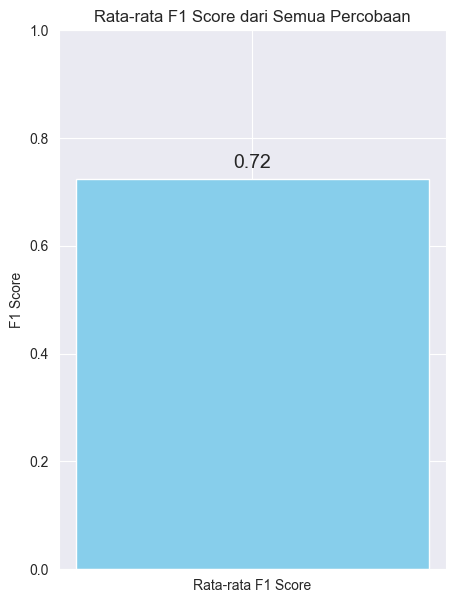

In [11]:
# Fungsi untuk menghitung Precision, Recall, dan F1 Score berbasis token
def calculate_f1_for_all_responses(true_responses, predicted_responses):
    f1_scores = []

    for true, predicted in zip(true_responses, predicted_responses):
        true_tokens = true.split()
        predicted_tokens = predicted.split()

        # Hitung token yang cocok
        tp = len(set(true_tokens) & set(predicted_tokens))  # True Positives
        fp = len(set(predicted_tokens) - set(true_tokens))  # False Positives
        fn = len(set(true_tokens) - set(predicted_tokens))  # False Negatives

        # Hitung Precision, Recall, F1 Score
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        if precision + recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)

        f1_scores.append(f1)

    return np.mean(f1_scores), f1_scores  # Return rata-rata F1 Score dan semua F1 Score


# Menghitung rata-rata F1 Score untuk semua percobaan
average_f1_score, _ = calculate_f1_for_all_responses(true_responses, predicted_responses)

# Visualisasi Rata-rata F1 Score dengan Bar Chart
plt.figure(figsize=(5, 7))
plt.bar(['Rata-rata F1 Score'], [average_f1_score], color='skyblue')

# Tambahkan judul dan label
plt.title('Rata-rata F1 Score dari Semua Percobaan')
plt.ylim(0, 1)  # Set limit y-axis dari 0 ke 1
plt.ylabel('F1 Score')

# Tampilkan nilai F1 Score di atas bar
plt.text(0, average_f1_score + 0.02, f'{average_f1_score:.2f}', ha='center', fontsize=14)

# Tampilkan plot
plt.show()

# Confusion Matrix

              precision    recall  f1-score   support

Tidak sesuai       1.00      1.00      1.00         2
      Sesuai       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



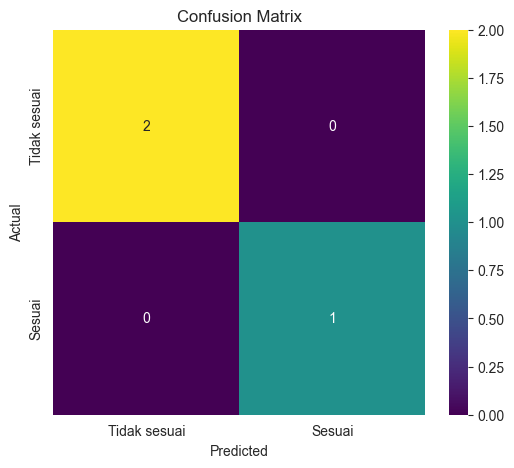

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# True responses (Jawaban Benar)
true_responses = [
    "Kampus ITPLN terletak di Menara PLN, Jl. Lkr. Luar Barat, Duri Kosambi, Kecamatan Cengkareng, Kota Jakarta Barat, Daerah Khusus Ibukota Jakarta 11750",
    "Untuk jurusan S1 Teknik Informatika, biaya yang perlu dipersiapkan hanya Rp.12.500.000 saja per semester.",
    "Institut Teknologi PLN menyediakan fasilitas terbaik untuk mahasiswa."
]

# Predicted responses (Jawaban Model)
predicted_responses = [
    "Kampus ITPLN terletak di kota Bandung, Jawa Barat, Indonesia.",
    "Untuk jurusan S1 Teknik Informatika, biaya yang perlu dipersiapkan hanya Rp.12.500.000 saja per semester.",
    "Institut Teknologi PLN memiliki fasilitas unggulan untuk mahasiswanya."
]

# Buat labels_true: 1 jika jawaban benar, 0 jika tidak sesuai
labels_true = [1 if true == pred else 0 for true, pred in zip(true_responses, predicted_responses)]

# Buat labels_pred berdasarkan prediksi model yang benar-benar berbeda dengan labels_true
# Contoh kasus, kita asumsikan bahwa model memprediksi semua sebagai kelas 1 (semua prediksi "benar").
# Namun, ini bisa diganti dengan prediksi model yang sesungguhnya.
labels_pred = [0 if pred != true else 1 for pred, true in zip(predicted_responses, true_responses)]

# Generate the classification report
report = classification_report(labels_true, labels_pred, target_names=['Tidak sesuai', 'Sesuai'])

print(report)

# Generate the confusion matrix
cm = confusion_matrix(labels_true, labels_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Tidak sesuai', 'Sesuai'],
            yticklabels=['Tidak sesuai', 'Sesuai'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


              precision    recall  f1-score   support

Tidak sesuai       0.50      1.00      0.67         1
      Sesuai       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



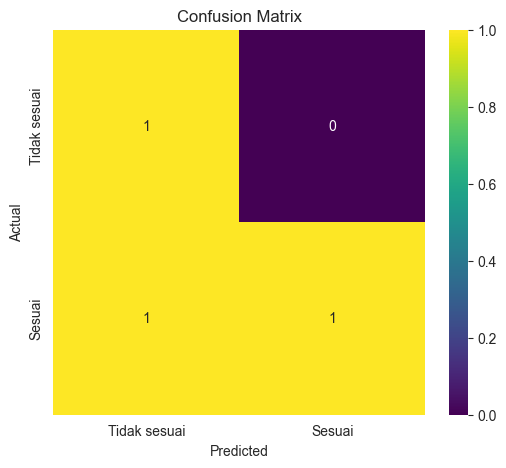

In [19]:
# Contoh evaluasi dengan distribusi prediksi yang benar
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi yang sebenarnya
labels_true = [1, 0, 1]  # Misalnya hasil sebenarnya
labels_pred = [1, 0, 0]  # Misalnya model memprediksi semua sebagai 1

# Generate the classification report
report = classification_report(labels_true, labels_pred, target_names=['Tidak sesuai', 'Sesuai'])

print(report)

# Generate the confusion matrix
cm = confusion_matrix(labels_true, labels_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Tidak sesuai', 'Sesuai'],
            yticklabels=['Tidak sesuai', 'Sesuai'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# New F1 Score

In [13]:
def compute_f1_score(true_texts, predicted_texts):
    true_tokens = [text.split() for text in true_texts]
    predicted_tokens = [text.split() for text in predicted_texts]

    f1_scores = []

    for true, pred in zip(true_tokens, predicted_tokens):
        # Hitung jumlah token yang benar dan prediksi yang benar
        true_counter = Counter(true)
        pred_counter = Counter(pred)

        # Hitung true positives, false positives, dan false negatives
        tp = sum((true_counter & pred_counter).values())
        fp = sum((pred_counter - true_counter).values())
        fn = sum((true_counter - pred_counter).values())

        # Hitung precision, recall, dan F1
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

        f1_scores.append(f1)
    
    print(f1_scores)

    return sum(f1_scores) / len(f1_scores) if f1_scores else 0


f1_before = compute_f1_score(true_respones_before_fine_tuning, predicted_responses_before_fine_tuning)
f1_after = compute_f1_score(true_responses, predicted_responses)
print(f"F1-Score untuk text generation sebelum fine tuning: {f1_before}")
print(f"F1-Score untuk text generation setelah fine tuning: {f1_after}")

[0.15789473684210525, 0.017543859649122806, 0.06629834254143646, 0.2156862745098039, 0.10909090909090909, 0.03846153846153846, 0.09574468085106382, 0.15730337078651685, 0.13186813186813187, 0.07547169811320754, 0.08695652173913045, 0.1473684210526316, 0.09836065573770493, 0.04926108374384237, 0.17600000000000002, 0.08219178082191782, 0.17204301075268816, 0.2637362637362637, 0.19565217391304346, 0.20588235294117643, 0.1935483870967742, 0.07339449541284403, 0.1, 0.22471910112359555, 0.2403846153846154]
[1.0, 1.0, 1.0, 1.0, 0.17857142857142858, 0.21739130434782605, 0.25, 1.0, 1.0, 0.1818181818181818, 1.0, 1.0, 1.0, 1.0, 0.08333333333333333, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0.032786885245901634, 1.0, 0.07142857142857142, 1.0]
F1-Score untuk text generation sebelum fine tuning: 0.13499449624680257
F1-Score untuk text generation setelah fine tuning: 0.7206131881898098


F1 Scores Before Fine-Tuning:
     No Precision    Recall  F1 Score
      1  0.115385      0.25  0.157895
      2  0.010204    0.0625  0.017544
      3    0.0375  0.285714  0.066298
      4  0.141026  0.458333  0.215686
      5  0.090909  0.136364  0.109091
      6  0.020725  0.266667  0.038462
      7  0.054545  0.391304  0.095745
      8  0.101449      0.35  0.157303
      9  0.089552      0.25  0.131868
     10  0.044944  0.235294  0.075472
     11  0.048913  0.391304  0.086957
     12  0.090909  0.388889  0.147368
     13  0.055556  0.428571  0.098361
     14  0.026042  0.454545  0.049261
     15  0.114583   0.37931  0.176000
     16  0.046875  0.333333  0.082192
     17  0.137931  0.228571  0.172043
     18  0.171429  0.571429  0.263736
     19  0.169811  0.230769  0.195652
     20  0.166667  0.269231  0.205882
     21  0.160714  0.243243  0.193548
     22  0.039216  0.571429  0.073394
     23   0.06383  0.230769  0.100000
     24  0.153846  0.416667  0.224719
     25  0.185185  0

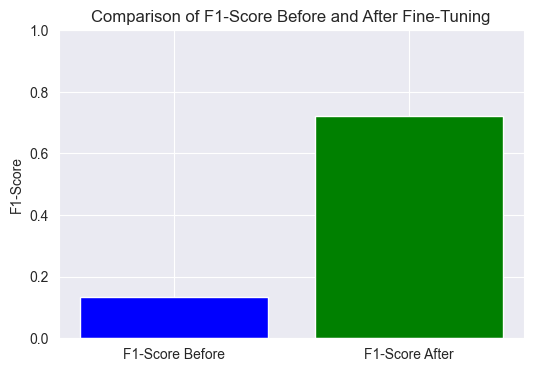

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Fungsi untuk menghitung precision, recall, dan F1 score
def compute_f1_details(true_texts, predicted_texts):
    true_tokens = [text.split() for text in true_texts]
    predicted_tokens = [text.split() for text in predicted_texts]

    scores = []

    for idx, (true, pred) in enumerate(zip(true_tokens, predicted_tokens)):
        # Hitung jumlah token yang benar dan prediksi yang benar
        true_counter = Counter(true)
        pred_counter = Counter(pred)

        # Hitung true positives, false positives, dan false negatives
        tp = sum((true_counter & pred_counter).values())
        fp = sum((pred_counter - true_counter).values())
        fn = sum((true_counter - pred_counter).values())

        # Hitung precision, recall, dan F1
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

        scores.append({
            'No': idx + 1,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    # Hitung rata-rata F1 score
    avg_f1_score = sum([score['F1 Score'] for score in scores]) / len(scores) if scores else 0
    scores.append({
        'No': 'Average',
        'Precision': '',
        'Recall': '',
        'F1 Score': avg_f1_score
    })

    return scores


# Hitung F1 scores untuk sebelum dan sesudah fine-tuning
f1_scores_before = compute_f1_details(true_responses_before_fine_tuning, predicted_responses_before_fine_tuning)
f1_scores_after = compute_f1_details(true_responses, predicted_responses)

# Konversi ke DataFrame untuk ditampilkan
df_f1_scores_before = pd.DataFrame(f1_scores_before)
df_f1_scores_after = pd.DataFrame(f1_scores_after)

# Tampilkan tabel F1 scores sebelum fine-tuning
print("F1 Scores Before Fine-Tuning:")
print(df_f1_scores_before.to_string(index=False))

# Tampilkan tabel F1 scores sesudah fine-tuning
print("\nF1 Scores After Fine-Tuning:")
print(df_f1_scores_after.to_string(index=False))

# Visualisasi Bar Chart Perbandingan
f1_before = df_f1_scores_before[df_f1_scores_before['No'] == 'Average']['F1 Score'].values[0]
f1_after = df_f1_scores_after[df_f1_scores_after['No'] == 'Average']['F1 Score'].values[0]

labels = ['F1-Score Before', 'F1-Score After']
f1_values = [f1_before, f1_after]

plt.figure(figsize=(6, 4))
plt.bar(labels, f1_values, color=['blue', 'green'])
plt.title('Comparison of F1-Score Before and After Fine-Tuning')
plt.ylim(0, 1)
plt.ylabel('F1-Score')
plt.show()
